In [2]:
# Import core data manipulation and visualization libraries
import pandas as pd # DataFrame operations and CSV handling
import numpy as np # Numerical computing and array operations
import matplotlib.pyplot as plt # Base plotting library
import seaborn as sns # Enhanced visualizations and statistical plots

# Machine learning components from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, KFold # Data splitting and cross-validation
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Feature scaling and categorical encoding
from sklearn.compose import ColumnTransformer # Column-wise transformations
from sklearn.pipeline import Pipeline # ML workflow automation
from sklearn.metrics import mean_squared_error, r2_score # Regression evaluation metrics

from sklearn.linear_model import LinearRegression # Baseline linear model
from sklearn.tree import DecisionTreeRegressor # Tree-based regression
from xgboost import XGBRegressor # Gradient boosting implementation

# Deep learning components from Keras
from tensorflow.keras.models import Sequential # Neural network container
from tensorflow.keras.layers import Dense # Fully connected layers
from tensorflow.keras.optimizers import Adam # Adaptive learning rate optimizer
from tensorflow.keras.callbacks import EarlyStopping # Overfitting prevention

# Load dataset from CSV file into pandas DataFrame
df = pd.read_csv('dataset.csv')

# Initial data inspection - displays first 5 rows
# Helps verify data structure, column names, and initial patterns
df.head()


Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

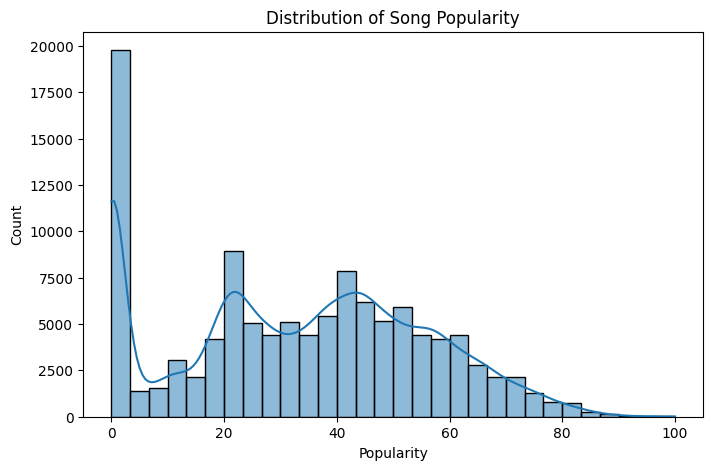

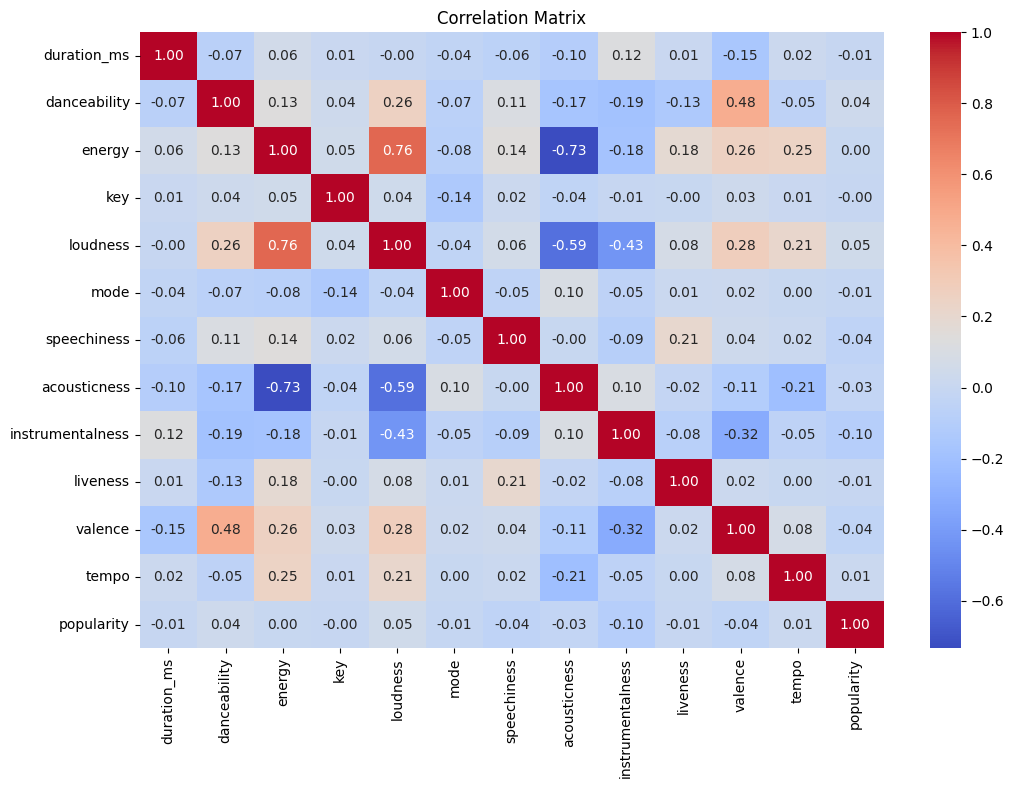

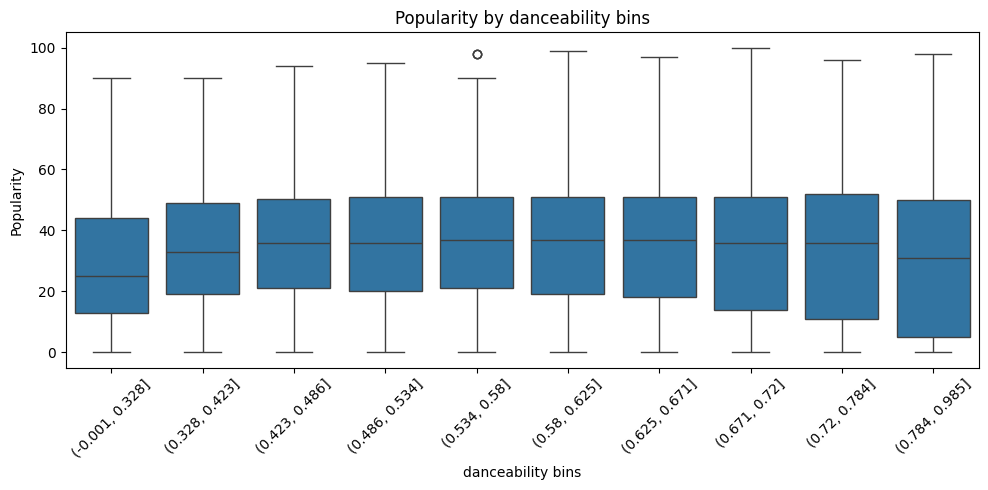

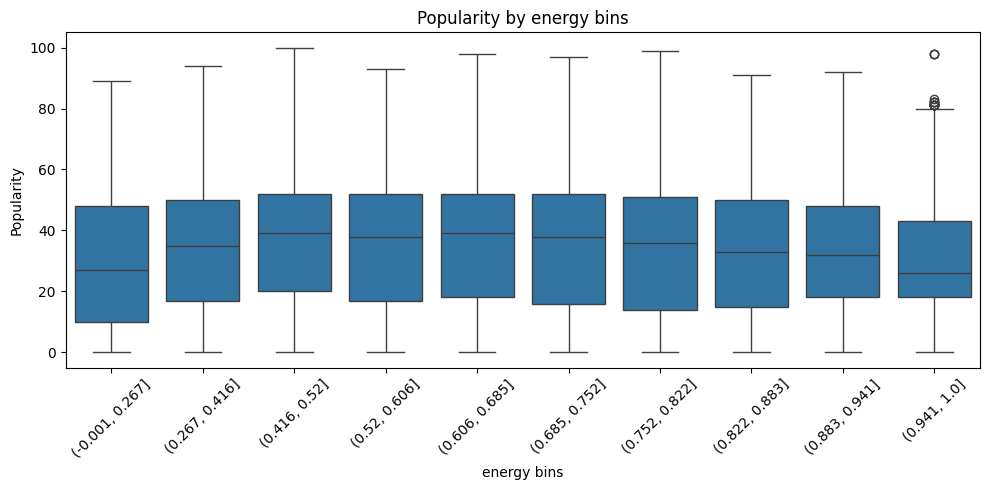

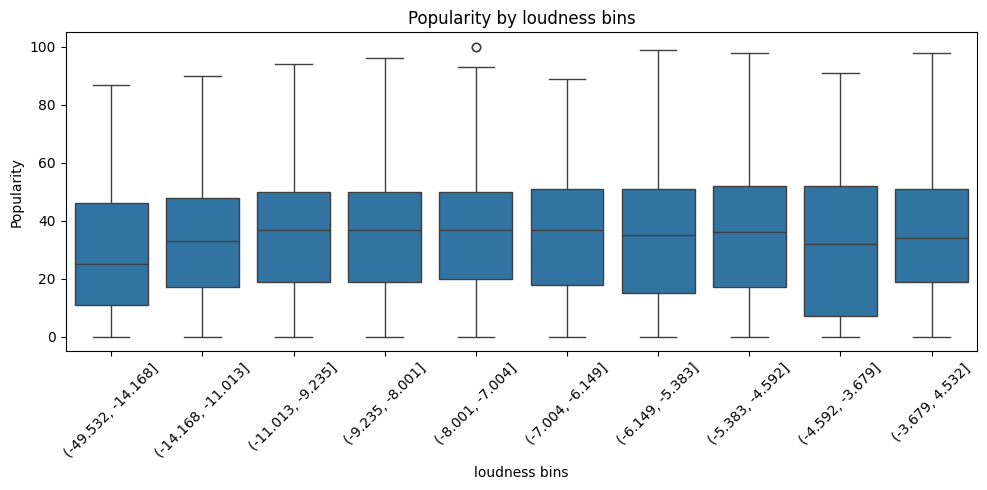

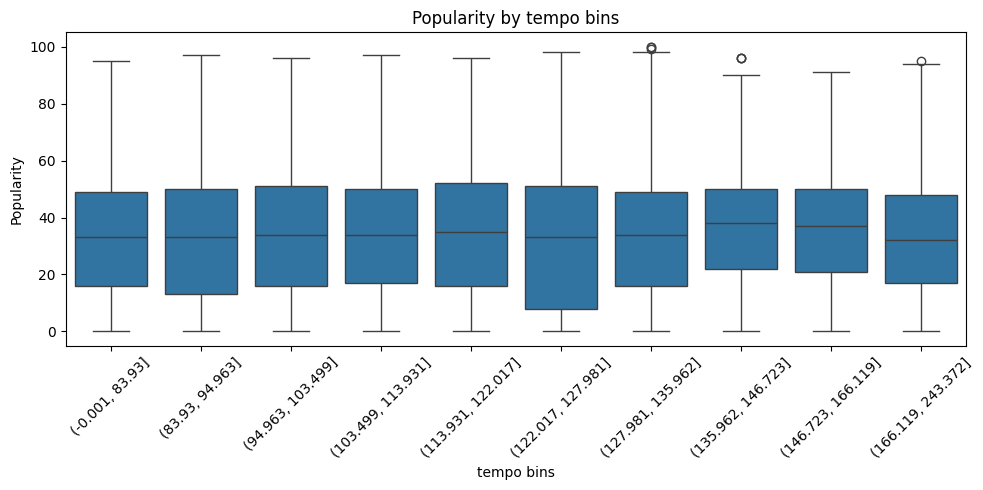

In [ ]:
# Display concise summary of the DataFrame including:
# - Number of non-null entries per column
# - Data types of each column
# - Memory usage
# This helps identify missing values and understand data structure
df.info()

# Calculate and display the count of missing (null) values in each column
# Important for data cleaning and deciding imputation strategies
df.isnull().sum()

# Generate summary statistics for numeric columns:
# - count, mean, std deviation, min, quartiles, max
# Useful for understanding distributions, detecting outliers, and data ranges
df.describe()

# Visualize the distribution of the target variable 'popularity'
# Histogram with kernel density estimate (KDE) overlay shows frequency and distribution shape
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# Define a list of numeric features to analyze correlations with the target
numeric_features = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


# Compute the correlation matrix between numeric features and the target variable
# Correlation values range from -1 to 1 indicating strength and direction of linear relationships
corr = df[numeric_features + ['popularity']].corr()

# Plot a heatmap of the correlation matrix with annotations for exact values
# 'coolwarm' color palette visually distinguishes positive (warm) and negative (cool) correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

import pandas as pd

for feature in ['danceability', 'energy', 'loudness', 'tempo']:
    df['binned'] = pd.qcut(df[feature], 10, duplicates='drop')
    plt.figure(figsize=(10,5))
    sns.boxplot(x='binned', y='popularity', data=df)
    plt.title(f'Popularity by {feature} bins')
    plt.xlabel(f'{feature} bins')
    plt.ylabel('Popularity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
df.drop(columns='binned', inplace=True)  # Clean up temporary column


In [4]:
# Convert the 'explicit' column from boolean (True/False) to integer (1/0)
# This transformation is necessary because many ML algorithms require numeric inputs
df['explicit'] = df['explicit'].astype(int)

# Create a new feature 'duration_sec' by converting song duration from milliseconds to seconds
# This makes the feature more interpretable and can improve model performance
df['duration_sec'] = df['duration_ms'] / 1000

# Drop columns that are not useful for modeling:
# - 'track_id': unique identifier, no predictive value
# - 'artists', 'album_name', 'track_name': textual metadata unlikely to help without further processing
# - 'duration_ms': replaced by 'duration_sec' for better interpretability
df_model = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'duration_ms'])

# Examine the distribution of unique values in the categorical feature 'track_genre'
# This helps understand the variety and frequency of genres in the dataset
print(df_model['track_genre'].value_counts())

# Display the first few rows of the final DataFrame prepared for modeling
# Allows verification of the resulting columns and data after transformations
df_model.head()


track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64


Unnamed: 0  popularity  explicit  danceability  energy  key  loudness  \
0           0          73         0         0.676  0.4610    1    -6.746   
1           1          55         0         0.420  0.1660    1   -17.235   
2           2          57         0         0.438  0.3590    0    -9.734   
3           3          71         0         0.266  0.0596    0   -18.515   
4           4          82         0         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature track_genre  duration_sec  
0   87.917               4    acoustic       230.666  
1   77.489               4    acoustic       149.610  
2   76.332               4    acoustic       210.826  
3  181.740               3    acoustic       201.933  
4  119.949               4    acoustic       198.853

In [5]:
# Separate the dataset into features (X) and the target variable (y)
# Features (X) include all columns except 'popularity' which is the variable to predict
X = df_model.drop('popularity', axis=1)
y = df_model['popularity']

# Split the dataset into training and testing subsets
# 80% of data is used for training the model, 20% reserved for evaluating its performance
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Identify feature types for proper processing
# Categorical columns include both text-based and numerically encoded categories
categorical_cols = ['track_genre', 'key', 'mode', 'time_signature'] # 'key' and 'mode' treated as categorical
numeric_cols = [col for col in X.columns if col not in categorical_cols] # Remaining columns are numerical

from sklearn.impute import SimpleImputer

# Create processing pipelines for different data types

### NUMERICAL FEATURE PIPELINE ###
numeric_transformer = Pipeline(steps=[
    # Handle missing values using median (robust to outliers)
    ('imputer', SimpleImputer(strategy='median')),
    # Standardize features to mean=0, std=1 for better model convergence
    ('scaler', StandardScaler())
])

### CATEGORICAL FEATURE PIPELINE ###
categorical_transformer = Pipeline(steps=[
    # Fill missing categories with 'missing' as a new category
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    # Convert categories to binary columns (one-hot encoding)
    # handle_unknown='ignore' prevents errors from new categories during inference
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### COMBINED PREPROCESSOR ###
preprocessor = ColumnTransformer(transformers=[
    # Apply numeric pipeline to numerical columns
    ('num', numeric_transformer, numeric_cols),
    # Apply categorical pipeline to categorical columns
    ('cat', categorical_transformer, categorical_cols)
])


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Create an end-to-end machine learning pipeline that:
# 1. Applies all preprocessing steps (scaling, encoding, imputation)
# 2. Trains a linear regression model
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor), # Applies column transformations
    ('regressor', LinearRegression()) # Ordinary Least Squares regression
])

# Train the model on the training data
# The pipeline automatically transforms features before fitting
model_lr.fit(X_train, y_train)

# Generate popularity predictions on the test set
# Pipeline automatically applies the same preprocessing to new data
y_pred_lr = model_lr.predict(X_test)

# Calculate evaluation metrics:
# RMSE (Root Mean Squared Error) - Smaller values indicate better fit
# R² (R-squared) - 0-1 scale where 1 = perfect prediction
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}") # Typical interpretation: average error in popularity units
print(f"Linear Regression R2: {r2_lr:.2f}") # Percentage of variance explained by the model


Linear Regression RMSE: 19.11
Linear Regression R2: 0.26


In [8]:
from sklearn.tree import DecisionTreeRegressor

# Create a pipeline that includes preprocessing and a Decision Tree regressor
model_dt = Pipeline(steps=[
    ('preprocessor', preprocessor), # Apply the same preprocessing steps as before
    ('regressor', DecisionTreeRegressor(random_state=42)) # Decision Tree model with fixed random seed for reproducibility
])

# Train the decision tree model on the training data
model_dt.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_dt = model_dt.predict(X_test)

# Calculate evaluation metrics for the Decision Tree model
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))  # Root Mean Squared Error
r2_dt = r2_score(y_test, y_pred_dt) # R-squared score

# Print the performance results
print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Decision Tree R2: {r2_dt:.2f}")


Decision Tree RMSE: 20.00
Decision Tree R2: 0.19


In [9]:
from xgboost import XGBRegressor

# Create a pipeline combining preprocessing and XGBoost regression model
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor), # Apply preprocessing steps: imputation, scaling, encoding
    ('regressor', XGBRegressor(random_state=42, eval_metric='rmse')) # XGBoost regressor with fixed seed and RMSE evaluation metric
])

# Train the XGBoost model on the training data
model_xgb.fit(X_train, y_train)

# Predict popularity values on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate evaluation metrics for the XGBoost model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb)) # Root Mean Squared Error
r2_xgb = r2_score(y_test, y_pred_xgb) # R-squared score

# Print the performance results
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R2: {r2_xgb:.2f}")


XGBoost RMSE: 17.26
XGBoost R2: 0.40


In [10]:
# Preprocess the data separately for the neural network
# The ColumnTransformer outputs sparse matrices for categorical features after one-hot encoding
# Neural networks require dense numpy arrays, so convert sparse matrices to dense arrays using .toarray()
X_train_nn = preprocessor.fit_transform(X_train).toarray()
X_test_nn = preprocessor.transform(X_test).toarray()

# Define a function to build the neural network model
def build_nn():
    model = Sequential([
        # Input layer with 64 neurons and ReLU activation
        Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
        # Hidden layer with 32 neurons and ReLU activation
        Dense(32, activation='relu'),
        # Output layer with 1 neuron (regression output)
        Dense(1)
    ])
    # Compile the model with Adam optimizer and mean squared error loss function
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Instantiate the neural network model
nn_model = build_nn()

# Use EarlyStopping callback to monitor validation loss and stop training if no improvement for 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the neural network
# - validation_split=0.2 reserves 20% of training data for validation during training
# - epochs=100 sets maximum number of training iterations
# - batch_size=32 controls number of samples per gradient update
# - callbacks includes early stopping to prevent overfitting
history = nn_model.fit(
    X_train_nn, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict popularity on the test set
# Flatten the output to convert from 2D array to 1D array for metric calculations
y_pred_nn = nn_model.predict(X_test_nn).flatten()

# Calculate evaluation metrics for the neural network
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn)) # Root Mean Squared Error
r2_nn = r2_score(y_test, y_pred_nn) # R-squared score

# Print the performance results
print(f"Neural Network RMSE: {rmse_nn:.2f}")
print(f"Neural Network R2: {r2_nn:.2f}")


Epoch 1/100


C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 601.2017 - val_loss: 367.5350
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - loss: 361.1575 - val_loss: 361.6432
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - loss: 357.3553 - val_loss: 357.9301
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - loss: 348.8023 - val_loss: 355.0695
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - loss: 341.7177 - val_loss: 351.9019
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - loss: 342.0439 - val_loss: 350.7067
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - loss: 339.9608 - val_loss: 348.5448
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - loss: 333.7333 - val_loss: 348.8123
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - loss: 330.8495 - val_loss: 346.4358
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - loss: 327.5934 - val_loss: 344.3557
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - los

In [ ]:
# Define a K-Fold cross-validator with 5 splits
# shuffle=True randomizes data before splitting to ensure representative folds
# random_state=42 ensures reproducibility of the splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to compute average RMSE using cross-validation
def cv_rmse(model, X, y):
    # cross_val_score returns an array of scores for each fold
    # scoring='neg_root_mean_squared_error' returns negative RMSE (since higher is better in sklearn)
    # Negate the scores to get positive RMSE values
    scores = -cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kf)
    # Return the mean RMSE across all folds
    return scores.mean()

# Print cross-validated RMSE scores for each model
print("Cross-validated RMSE scores:")
print(f"Linear Regression: {cv_rmse(model_lr, X, y):.2f}")
print(f"Decision Tree: {cv_rmse(model_dt, X, y):.2f}")
print(f"XGBoost: {cv_rmse(model_xgb, X, y):.2f}")


Cross-validated RMSE scores:
Linear Regression: 19.20
Decision Tree: 20.24
XGBoost: 17.32


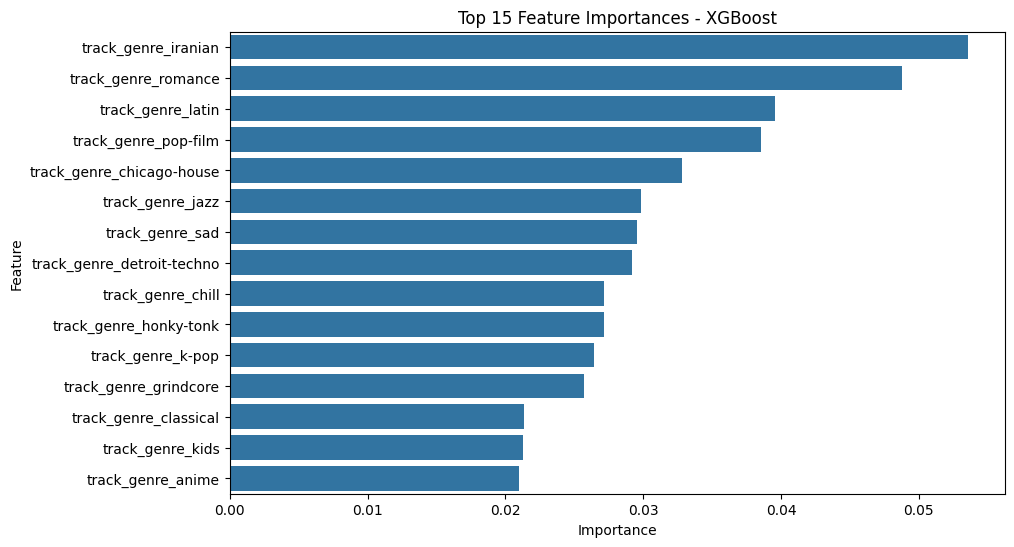

Regression Metrics on Test Set:
RMSE: 17.259
R²: 0.396
MAE: 12.248


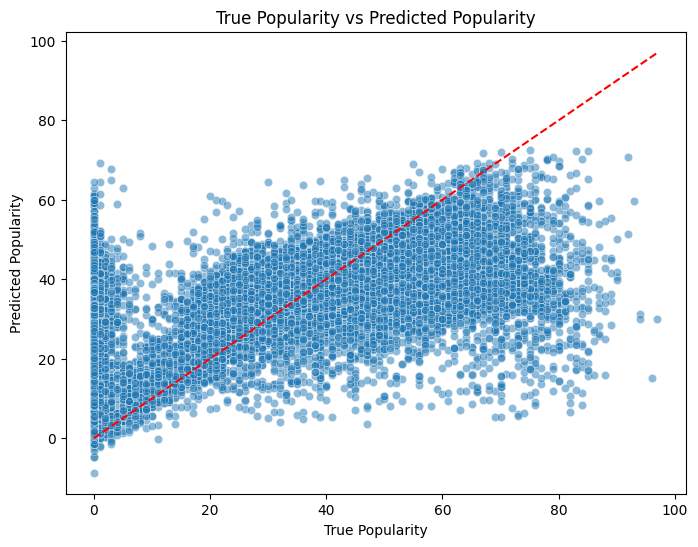

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Extract the one-hot encoded feature names from the preprocessor pipeline
# Access the 'onehot' encoder inside the categorical transformer of the ColumnTransformer
ohe_features = model_xgb.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine numeric feature names with the expanded one-hot encoded categorical feature names
all_features = numeric_cols + list(ohe_features)

# Retrieve feature importances from the trained XGBoost regressor
importances = model_xgb.named_steps['regressor'].feature_importances_

# Create a pandas Series for easy sorting and plotting, indexed by feature names
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

# Plot the top 15 most important features according to XGBoost
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title('Top 15 Feature Importances - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Predict popularity on the test set using the trained XGBoost model
y_pred = model_xgb.predict(X_test)

# Calculate key regression evaluation metrics on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred) # Coefficient of Determination (R²)
mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error

# Print the regression metrics with three decimal places for clarity
print(f"Regression Metrics on Test Set:")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")

# Visualize the relationship between true and predicted popularity values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5) # Scatter plot with transparency for overlapping points
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line (perfect prediction)
plt.title('True Popularity vs Predicted Popularity')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

